In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
def calcular_nota_prevencao(resposta):
    """
    Recebe o texto da coluna 'uso_preservativo' e retorna uma nota numérica.
    Escala: 0 (Nunca) a 4 (Sempre).
    """

    # 1. Tratamento de erro: Se vazio retorna None
    if not isinstance(resposta, str):
        return None

    # 2. limpeza
    texto_limpo = resposta.lower().strip()

    if texto_limpo == 'sempre':
        return 4
    elif texto_limpo == 'frequentemente':
        return 3
    elif texto_limpo == 'às vezes' or texto_limpo == 'as vezes':
        return 2
    elif texto_limpo == 'raramente':
        return 1
    elif texto_limpo == 'nunca':
        return 0
    else:
        # Caso "Não respondeu" ou em branco não daremos nota
        return None

In [56]:
pd.read_csv('trabalho_final.csv').head()

,idade,Qual é o seu gênero?,Quem mora com você? \nVocê pode marcar mais de uma opção.,orientacao_preservativo,uso_preservativo,conforto,segurança,seguranca_relacoes,frequencia,confia_metodos_tabela_coito,abriu_mao_preservativo,conhece_preservativos_especificos,Você já fez uso da PrEP?,inclusao_campanhas,faixa_etaria
0,18.0,Homem,Pai;Mãe;Irmão(s),Sim,Sempre,Sim,Concordo,Concordo,Raramente,Não,Não respondeu,Não respondeu,Não respondeu,Não respondeu,18-20
1,18.0,Homem,Mãe,Sim,Às vezes,Sim,Concordo totalmente,Concordo totalmente,Às vezes,Apenas no coito,Não respondeu,Não respondeu,Não respondeu,Não respondeu,18-20
2,24.0,Homem,Pai;Mãe;Irmão(s),Sim,Às vezes,Sim,Concordo totalmente,Concordo,Às vezes,Sim,Não respondeu,Não respondeu,Não respondeu,Não respondeu,21-25
3,18.0,Homem,Pai;Mãe,Sim,Nunca,Não,Concordo,Neutro,Sempre,Apenas no coito,Não respondeu,Não respondeu,Não respondeu,Não respondeu,18-20
4,18.0,Homem,Pai;Mãe,Sim,Às vezes,Apenas com meu pai,Concordo totalmente,Neutro,Raramente,Não,Não respondeu,Não respondeu,Não respondeu,Não respondeu,18-20


In [53]:
# Aplicando a função aos dados

# Criamos uma nova coluna 'nota_prevencao'
df['nota_prevencao'] = df['uso_preservativo'].apply(calcular_nota_prevencao)

# Visualizar como ficou a transformação
print(df[['uso_preservativo', 'nota_prevencao']]) #.head()


    uso_preservativo  nota_prevencao
0             Sempre               4
1           Às vezes               2
2           Às vezes               2
3              Nunca               0
4           Às vezes               2
..               ...             ...
102            Nunca               0
103            Nunca               0
104            Nunca               0
105        Raramente               1
106         Às vezes               2

[107 rows x 2 columns]


/tmp/ipython-input-3846868821.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_idade = df.groupby('faixa_etaria_calc')['nota_prevencao'].mean()


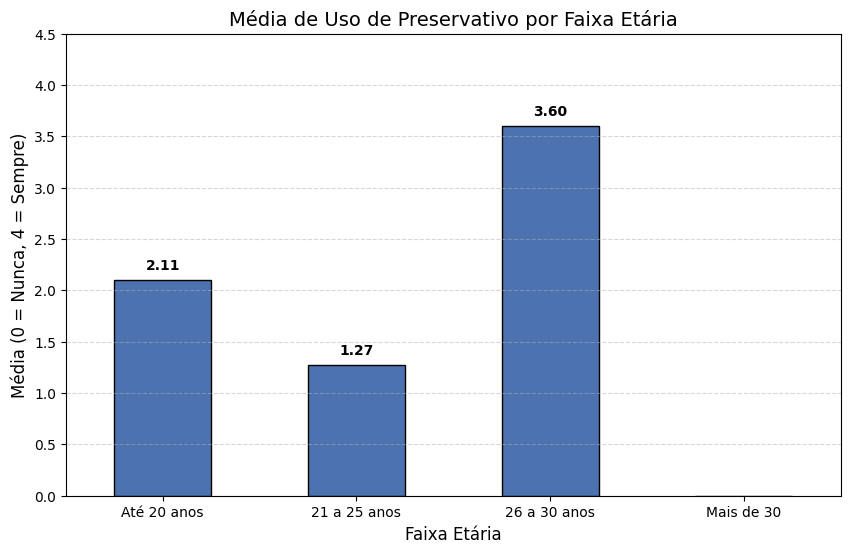

In [54]:
# 1. Criar faixas de idade (caso queira garantir faixas limpas a partir da idade numérica)
bins = [0, 20, 25, 30, 100]
labels = ['Até 20 anos', '21 a 25 anos', '26 a 30 anos', 'Mais de 30']
df['faixa_etaria_calc'] = pd.cut(df['idade'], bins=bins, labels=labels)

# 2. Calcular a média da nota por grupo
# Isso responde: "Qual grupo tem a maior 'média escolar' em uso de camisinha?"
media_por_idade = df.groupby('faixa_etaria_calc')['nota_prevencao'].mean()

# 3. Plotar o Gráfico
plt.figure(figsize=(10, 6))

# Gráfico de Barras
ax = media_por_idade.plot(kind='bar', color='#4c72b0', edgecolor='black')

# Melhorias visuais
plt.title('Média de Uso de Preservativo por Faixa Etária', fontsize=14)
plt.ylabel('Média (0 = Nunca, 4 = Sempre)', fontsize=12)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylim(0, 4.5) # Fixar o limite do eixo Y para caber a nota 4
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)

# Adicionar o valor exato em cima de cada barra
for i, v in enumerate(media_por_idade):
    if pd.notna(v): # Só escreve se o valor não for nulo
        ax.text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

plt.show()